In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\jahed\anaconda3\envs\mainone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load datasets
df = pd.read_csv('mobile.csv')

In [3]:
# Check the df
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
# Check for nulls
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:>

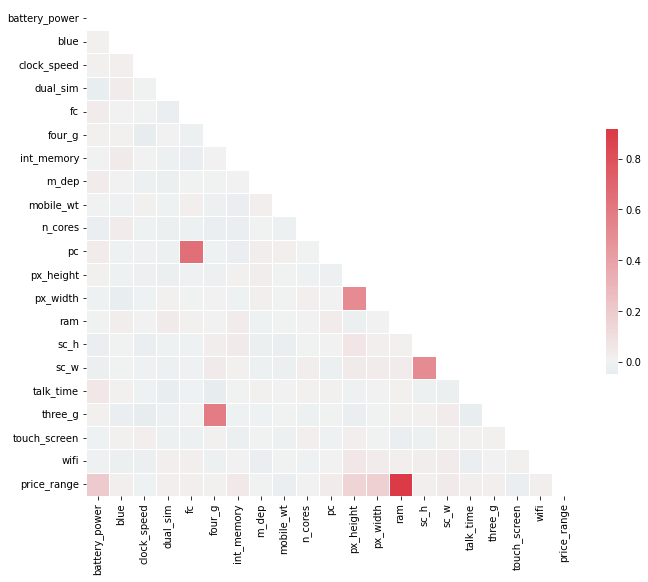

In [5]:
# heatmap
corr = df.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Build training and test datasets
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [7]:
# Load libraries
from sklearn.linear_model import LogisticRegression

# Setup an instance of the model
lr = LogisticRegression(random_state=0)

# Fit the model lr
lr.fit(x_train, y_train)

C:\Users\jahed\anaconda3\envs\mainone\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [8]:
# Build predictions lr
lr_pred = lr.predict(x_test)

# Calculate accuracy score lr
accuracy_score(y_test, lr_pred)

0.63

(Text(33.0, 0.5, 'Actual Value'), Text(0.5, 15.0, 'Predicted Value'))

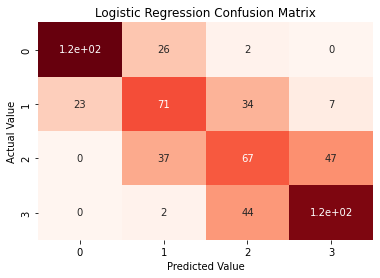

In [9]:
# Build a confusion matrix of the results lr
lr_matrix = confusion_matrix(y_test, lr_pred)

# Create pandas df lr
lr_cm = pd.DataFrame(lr_matrix)

# Create heatmap lr
ax= plt.subplot()
sns.heatmap(lr_cm, annot=True, cbar=None, cmap='Reds', ax=ax)
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('Actual Value'), ax.set_xlabel('Predicted Value')

In [10]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model rfc
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [11]:
# Build predictions rfc
rfc_pred = rfc.predict(x_test)

# Calculate accuracy score rfc
accuracy_score(y_test, rfc_pred)

0.875

(Text(33.0, 0.5, 'Actual Value'), Text(0.5, 15.0, 'Predicted Value'))

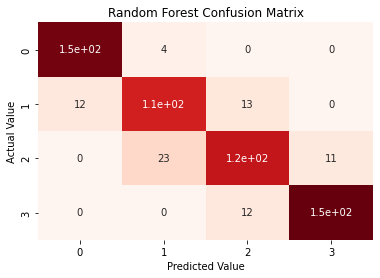

In [12]:
# Build a confusion matrix of the results rfc
rfc_matrix = confusion_matrix(y_test, rfc_pred)

# Create pandas df rfc
rfc_cm = pd.DataFrame(rfc_matrix)

# Create heatmap rfc
ax= plt.subplot()
sns.heatmap(rfc_cm, annot=True, cbar=None, cmap='Reds', ax=ax)
ax.set_title('Random Forest Confusion Matrix')
ax.set_ylabel('Actual Value'), ax.set_xlabel('Predicted Value')

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
# Build predictions dtc
dtc_pred = dtc.predict(x_test)

# Calculate accuracy score dtc
accuracy_score(y_test, dtc_pred)

0.8333333333333334

(Text(33.0, 0.5, 'Actual Value'), Text(0.5, 15.0, 'Predicted Value'))

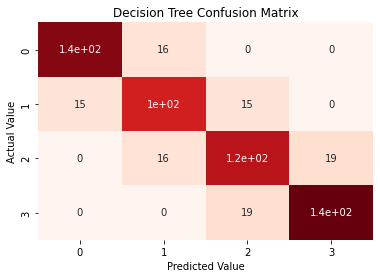

In [15]:
# Build a confusion matrix of the results dtc
dtc_matrix = confusion_matrix(y_test, dtc_pred)

# Create pandas df dtc
dtc_cm = pd.DataFrame(dtc_matrix)

# Create heatmap dtc
ax= plt.subplot()
sns.heatmap(dtc_cm, annot=True, cbar=None, cmap='Reds', ax=ax)
ax.set_title('Decision Tree Confusion Matrix')
ax.set_ylabel('Actual Value'), ax.set_xlabel('Predicted Value')